In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [2]:
df = pd.read_csv('Downloads/insurance.csv')
df.to_csv('Downloads/insurance2.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


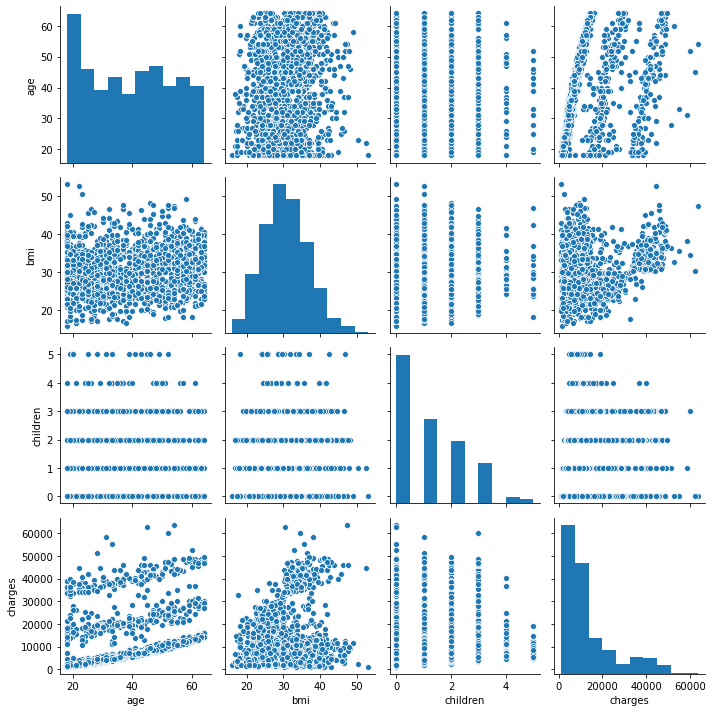

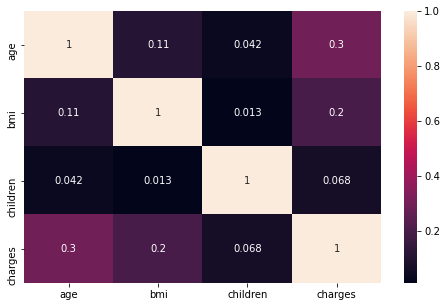

In [5]:
df.info()

sns.pairplot(df)
plt.tight_layout()


fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [6]:
#creating dummy variables for sex
dummy_sex=pd.get_dummies(df['sex'])
df=pd.concat([df,dummy_sex],axis=1)
df.to_csv('Downloads/insurance2.csv')

In [7]:
#creating dummy variables for region
dummy_region=pd.get_dummies(df['region'])
df=pd.concat([df,dummy_region],axis=1)
df.to_csv('Downloads/insurance2.csv')

In [8]:
df['charges'] = df['charges'] /df['charges'] .max() 
df['bmi'] = df['bmi'] /df['bmi'] .max() 

In [9]:
dummy_smoker=pd.get_dummies(df['smoker'])
df=pd.concat([df,dummy_smoker],axis=1)
df.to_csv('Downloads/insurance2.csv')


In [10]:
df

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest,no,yes
0,19,female,0.525127,0,yes,southwest,0.264777,1,0,0,0,0,1,0,1
1,18,male,0.635611,1,no,southeast,0.027059,0,1,0,0,1,0,1,0
2,28,male,0.621118,3,no,southeast,0.069773,0,1,0,0,1,0,1,0
3,33,male,0.427348,0,no,northwest,0.344744,0,1,0,1,0,0,1,0
4,32,male,0.543572,0,no,northwest,0.060637,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,0.582910,3,no,northwest,0.166230,0,1,0,1,0,0,1,0
1334,18,female,0.600791,0,no,northeast,0.034593,1,0,1,0,0,0,1,0
1335,18,female,0.693582,0,no,southeast,0.025558,1,0,0,0,1,0,1,0
1336,21,female,0.485601,0,no,southwest,0.031487,1,0,0,0,0,1,1,0


,sum_sq,df,F,PR(>F)
sex,0.158260,1.0,4.399702,0.036133
Residual,48.056703,1336.0,NaN,NaN


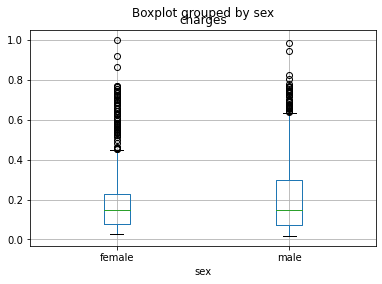

In [11]:
df.boxplot('charges',by='sex')
mod=ols('charges~sex',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

,sum_sq,df,F,PR(>F)
smoker,29.881937,1.0,2177.614868,8.271436e-283
Residual,18.333025,1336.0,NaN,NaN


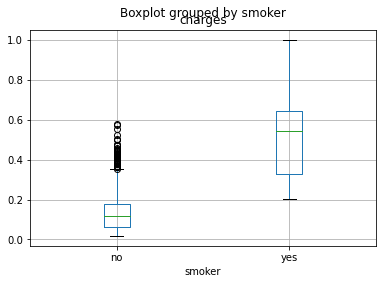

In [12]:
df.boxplot('charges',by='smoker')
mod=ols('charges~smoker',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

,sum_sq,df,F,PR(>F)
region,0.319859,3.0,2.969627,0.030893
Residual,47.895104,1334.0,NaN,NaN


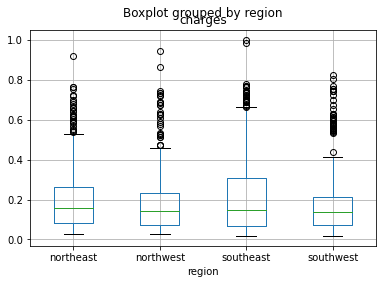

In [13]:
df.boxplot('charges',by='region')
mod=ols('charges~region',data=df).fit()
anov_table=sm.stats.anova_lm(mod,typ=2)
anov_table

In [30]:
final=df.drop(['northeast','yes','male','region','smoker','sex','children'],axis='columns')
final

,age,bmi,charges,female,northwest,southeast,southwest,no
0,19,0.525127,0.264777,1,0,0,1,0
1,18,0.635611,0.027059,0,0,1,0,1
2,28,0.621118,0.069773,0,0,1,0,1
3,33,0.427348,0.344744,0,1,0,0,1
4,32,0.543572,0.060637,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1333,50,0.582910,0.166230,0,1,0,0,1
1334,18,0.600791,0.034593,1,0,0,0,1
1335,18,0.693582,0.025558,1,0,1,0,1
1336,21,0.485601,0.031487,1,0,0,1,1


In [31]:
lm=LinearRegression()

In [32]:
X=final.drop('charges',axis='columns')
X

,age,bmi,female,northwest,southeast,southwest,no
0,19,0.525127,1,0,0,1,0
1,18,0.635611,0,0,1,0,1
2,28,0.621118,0,0,1,0,1
3,33,0.427348,0,1,0,0,1
4,32,0.543572,0,1,0,0,1
...,...,...,...,...,...,...,...
1333,50,0.582910,0,1,0,0,1
1334,18,0.600791,1,0,0,0,1
1335,18,0.693582,1,0,1,0,1
1336,21,0.485601,1,0,0,1,1


In [33]:
Y=final.charges
Y

0       0.264777
1       0.027059
2       0.069773
3       0.344744
4       0.060637
          ...   
1333    0.166230
1334    0.034593
1335    0.025558
1336    0.031487
1337    0.456973
Name: charges, Length: 1338, dtype: float64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [35]:
lm.fit(X_train,Y_train)
yhat = lm.predict(X_test)

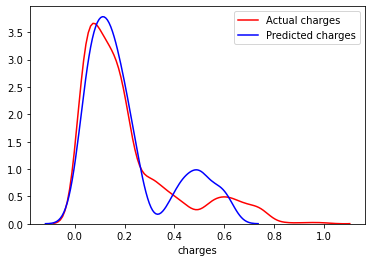

In [36]:
actual_charge = sns.distplot(df['charges'], hist = False, color='r', label='Actual charges')
sns.distplot(yhat, hist=False, color='b', label='Predicted charges', ax=actual_charge)

In [37]:
lm.coef_

array([ 0.00411013,  0.2729648 ,  0.00117008, -0.00997614, -0.01387854,
       -0.01257126, -0.36505752])

In [38]:
lm.intercept_

0.1869802469027713

In [39]:
mse=mean_squared_error(Y_test,yhat)
print('Root mean squared error:',math.sqrt(mse))

Root mean squared error: 0.09161221186582452


In [40]:
mse

0.00839279736294872

In [41]:
lm.score(X_train, Y_train)

0.7254533189952954